<a href="https://colab.research.google.com/github/Endy135/College_Managment_Project/blob/main/Reseaux_neurone_ND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation des librairies

In [1]:
!pip install -Uqq  timm # plus grande librairies de modèles de vision (271!)
!pip install -Uqq fastai
!pip install -Uqq fastbook

import timm, fastai, fastbook
fastai.__version__, fastbook.__version__


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.2 MB/s eta 0:00:00


('2.7.13', '0.0.29')

Importation des librairies

In [ ]:

from fastai.vision.all import *
from fastbook import *


**I. Développement du jeu de données**

In [ ]:
n_images = 200
urls_felins = search_images_ddg('felines', max_images=n_images)
urls_herbivores = search_images_ddg('herbivores', max_images=n_images)
urls_birds = search_images_ddg('birds', max_images=n_images)
urls_felins[0], urls_herbivores[0], urls_birds[0]

('https://cdn2.damnfunnypictures.com/felines_006.jpg',
 'https://assets.technologynetworks.com/production/dynamic/images/content/380674/most-plant-rewilding-efforts-fail-to-control-herbivores-380674-640x360.jpg',
 'https://www.birdsandblooms.com/wp-content/uploads/2017/09/09_JamesPrutilpac_BBoctnov17_Resized.jpg')

Visualisation d'une image de chaque catégorie collectée

In [ ]:
from fastdownload import download_url
dest1 = 'felins.jpg'
dest2 = 'herbivores.jpg'
dest3 = 'birds.jpg'
download_url(urls_felins[0], dest1, show_progress=True)
download_url(urls_herbivores[0], dest2, show_progress=True)
download_url(urls_birds[0], dest3, show_progress=True)

Path('birds.jpg')

In [ ]:
# Diviser les listes d'URLs pour chaque catégorie
urls_felines, extra_urls_felines = urls_felines[:160], urls_felines[160:200]
urls_herbivores, extra_urls_herbivores = urls_herbivores[:160], urls_herbivores[160:200]

# Afficher les premières URLs de chaque catégorie
print("Felines URLs:", urls_felines[:5])
print("Extra Felines URLs:", extra_urls_felines[:5])
print("\nHerbivores URLs:", urls_herbivores[:5])
print("Extra Herbivores URLs:", extra_urls_herbivores[:5])


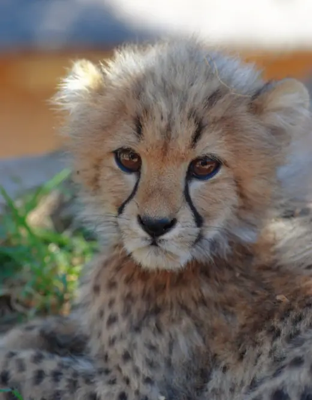

Image de felin


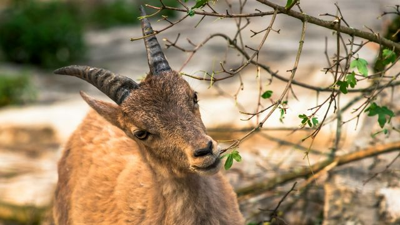

Image d'herbivore


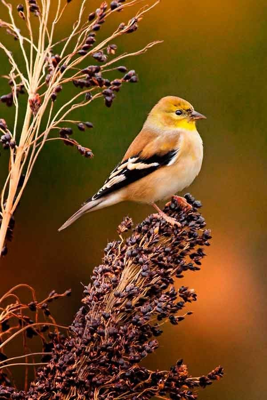

Image d'oiseau


In [ ]:
im1 = Image.open(dest1)
display(im1.to_thumb(400, 400))
print('Image de felin')


im2 = Image.open(dest2)
display(im2.to_thumb(400, 400))
print("Image d'herbivore")

im3 = Image.open(dest3)
display(im3.to_thumb(400, 400))
print("Image d'oiseau")

Téléchargement des images à partir des urls collectées

Pour cela, nous crééons 3 dossiers:

    data/: dossier racine des données
    data/felin: sous-dossier des images de felins
    data/herbivore: sous-dossier des images d'herbivores
    data/oiseau: sous-dossier des images d'herbivores